In [334]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso

In [315]:
df = pd.read_csv(r"C:\Users\aliko\PycharmProjects\Linear_Regression_2\CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [317]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

Text(0.5, 1.0, 'Horsepower vs Price')

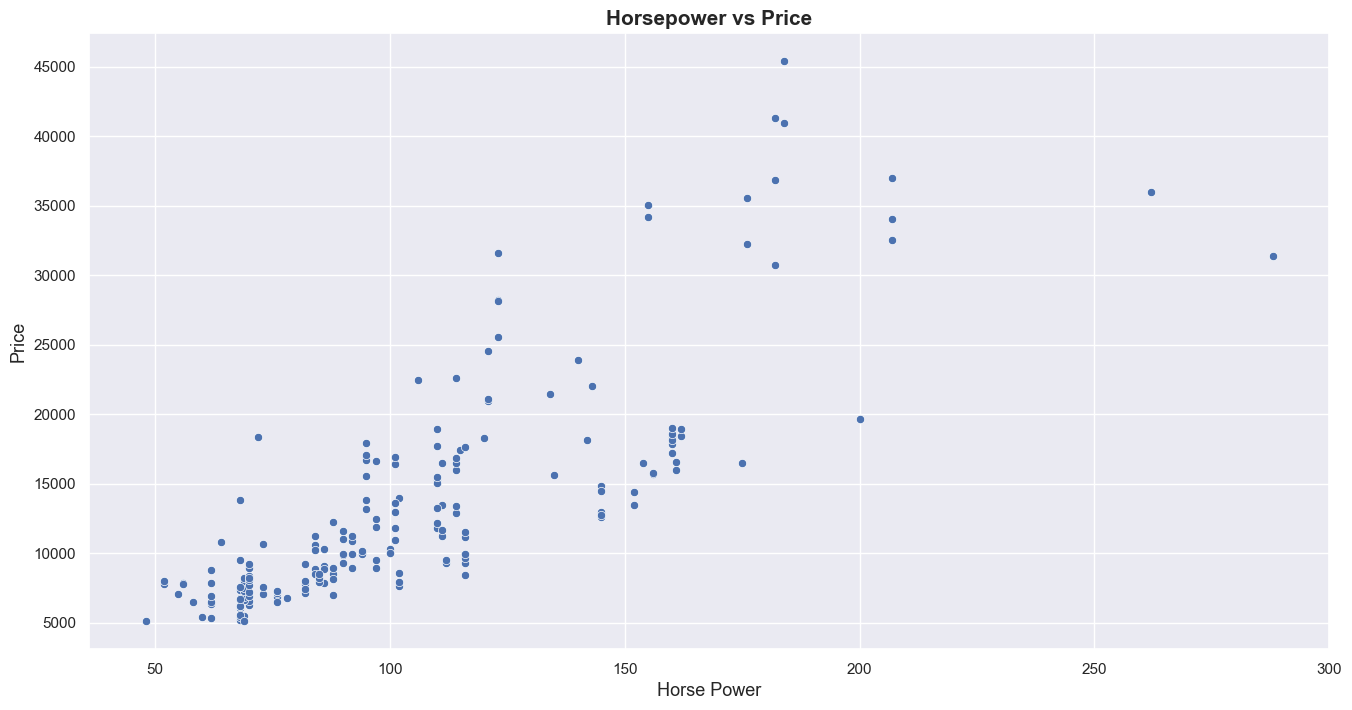

In [318]:
sns.scatterplot(x='horsepower', y='price', data=df)

plt.xlabel("Horse Power", size=13)
plt.ylabel("Price", size=13)
plt.title("Horsepower vs Price", size=15, weight='bold')

Text(0.5, 1.0, 'Car Length vs Price')

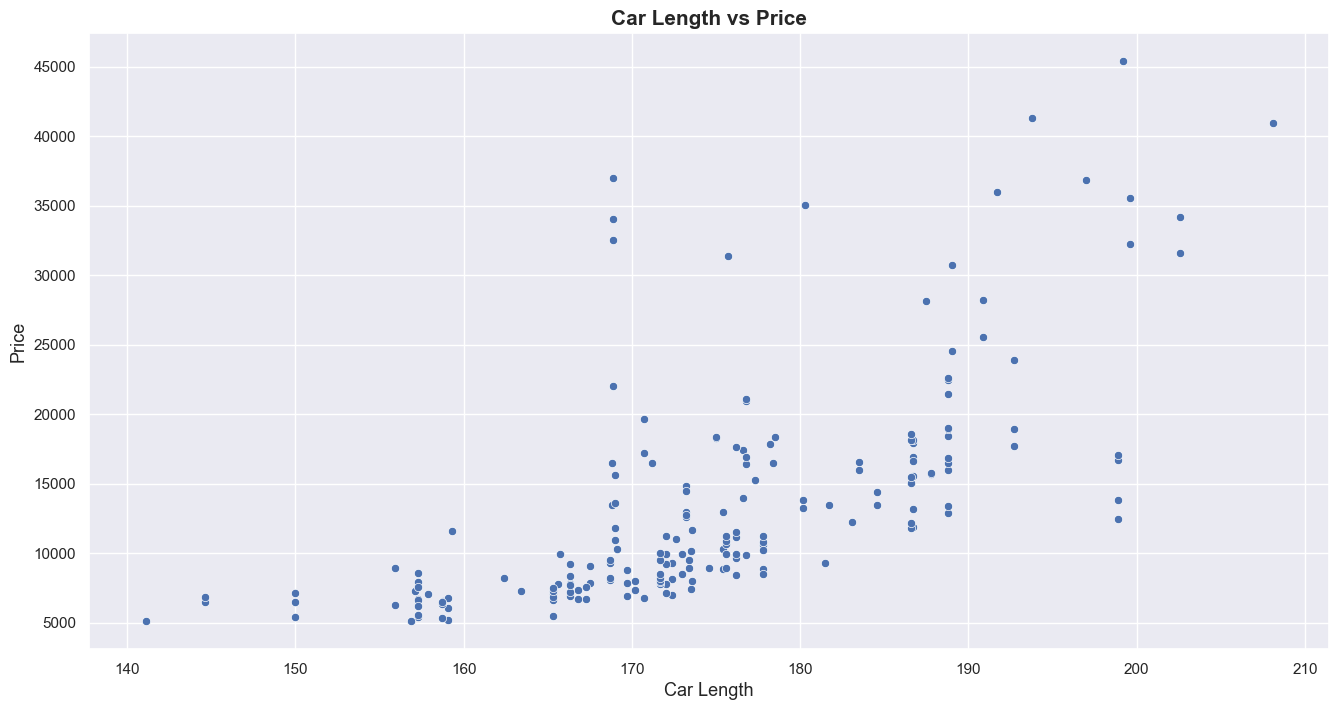

In [319]:
sns.scatterplot(x='carlength', y='price', data=df)

plt.xlabel("Car Length", size=13)
plt.ylabel("Price", size=13)
plt.title("Car Length vs Price", size=15, weight='bold')

Text(0.5, 1.0, 'Engine Size vs Price')

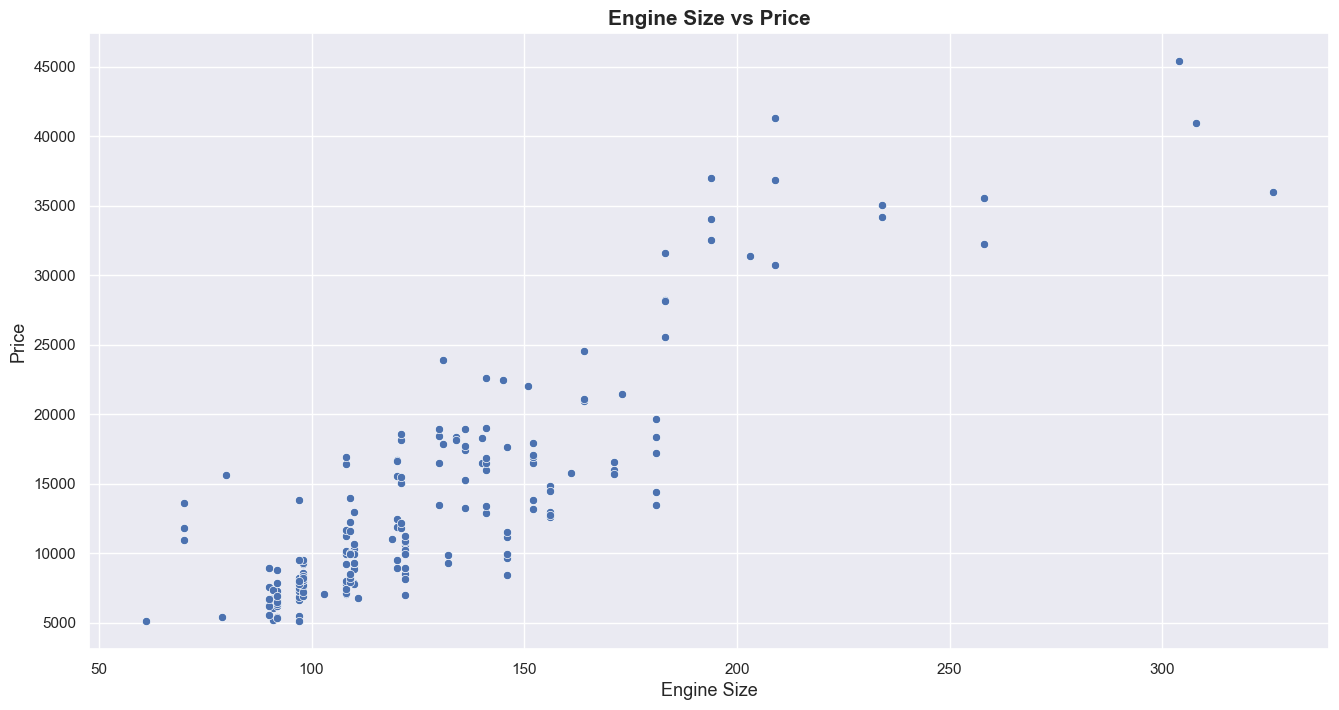

In [320]:
sns.scatterplot(x='enginesize', y='price', data=df)

plt.xlabel("Engine Size", size=13)
plt.ylabel("Price", size=13)
plt.title("Engine Size vs Price", size=15, weight='bold')

Text(0.5, 1.0, 'Curb Weight vs Price')

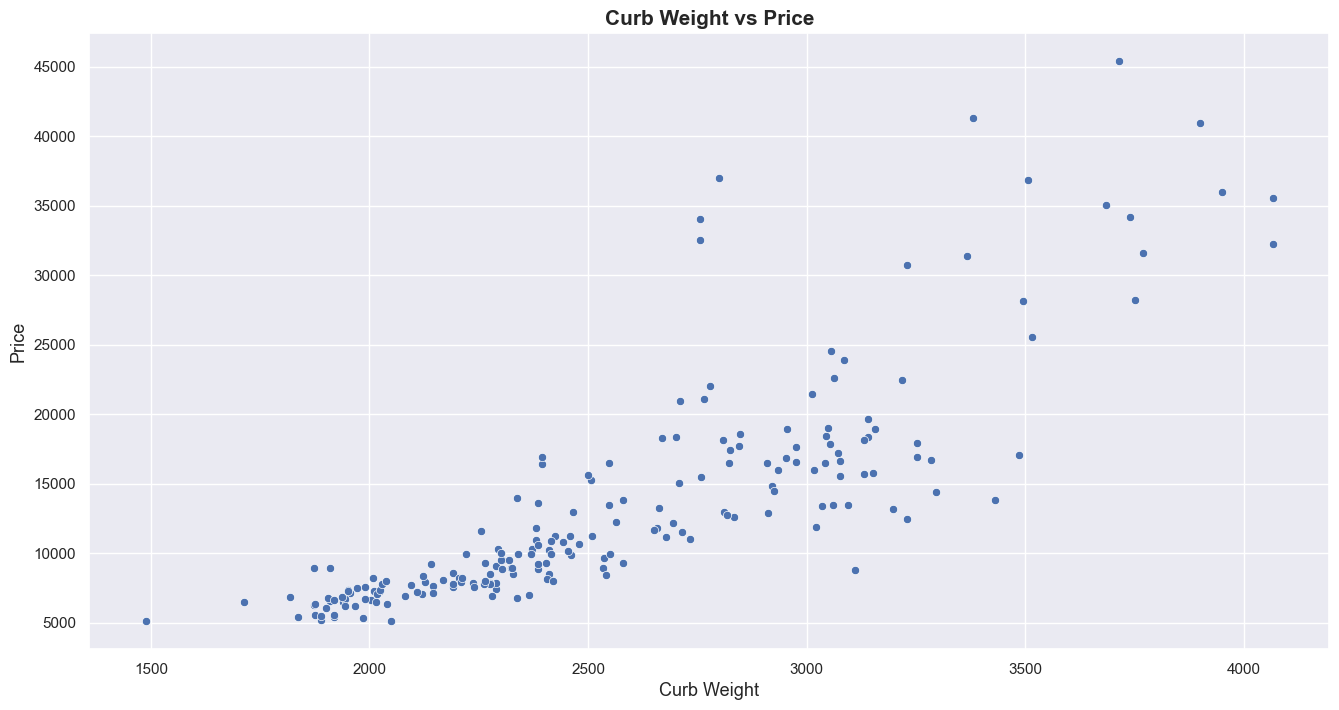

In [321]:
sns.scatterplot(x='curbweight', y='price', data=df)

plt.xlabel("Curb Weight", size=13)
plt.ylabel("Price", size=13)
plt.title("Curb Weight vs Price", size=15, weight='bold')

Text(0.5, 1.0, 'Symboling vs Price')

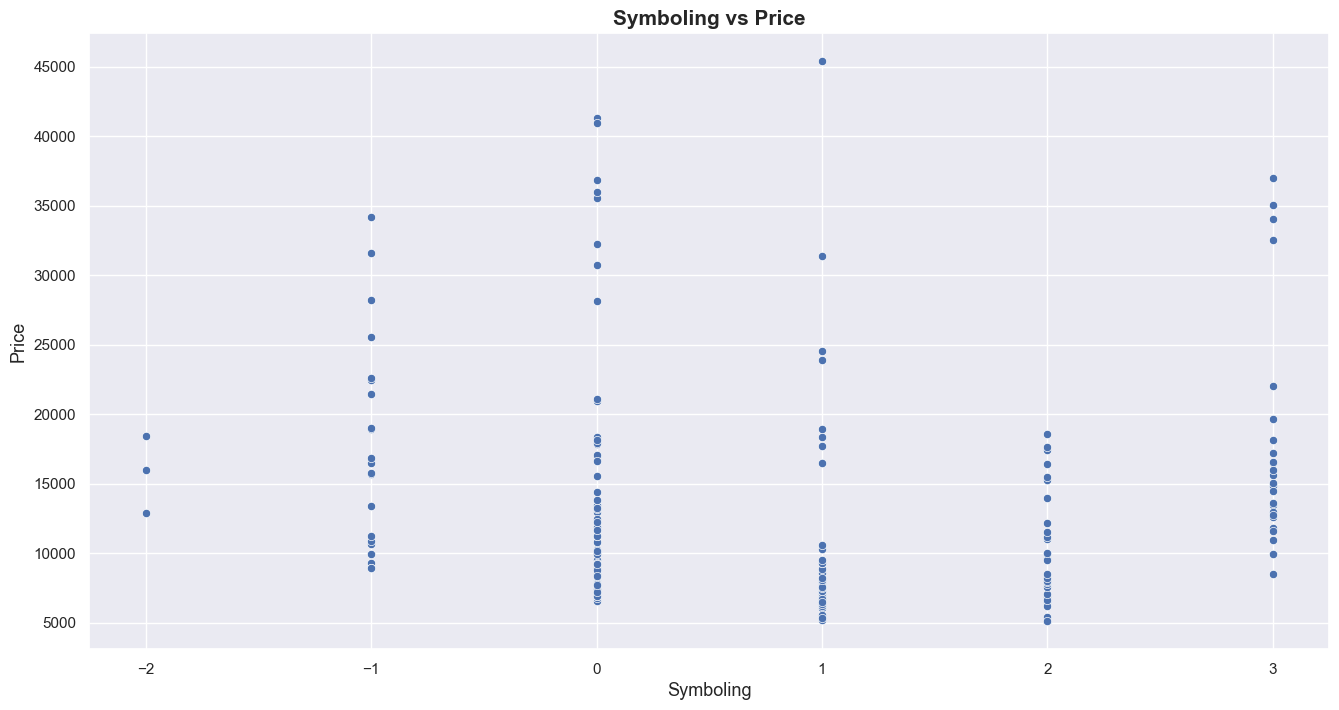

In [322]:
sns.scatterplot(x='symboling', y='price', data=df)

plt.xlabel("Symboling", size=13)
plt.ylabel("Price", size=13)
plt.title("Symboling vs Price", size=15, weight='bold')

In [323]:
def brand_from_name(x):
    result=[]
    for i in x:
        result.append(i.split(' ')[0])
    return result

In [324]:
df['CarName'] = brand_from_name(df['CarName'].values)
df.CarName.nunique()

28

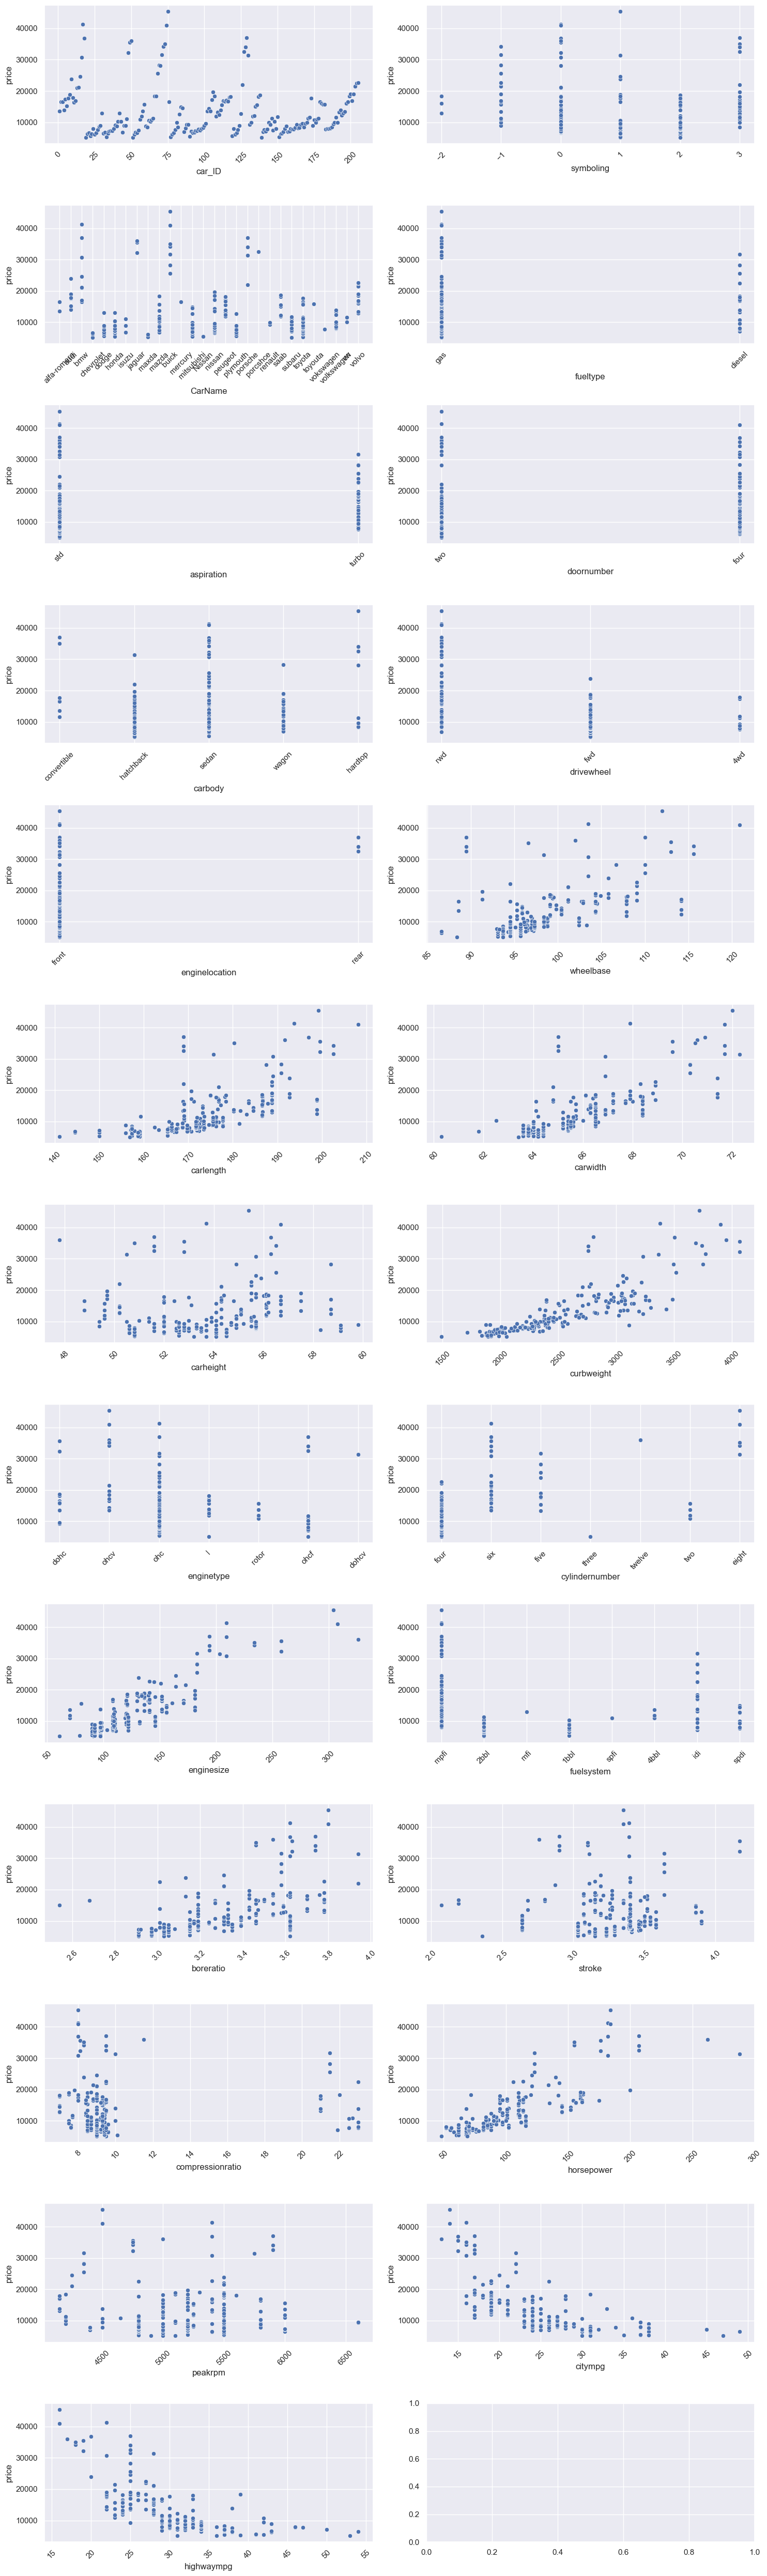

In [325]:
df1 = df.drop('price', axis=1)

f, axes = plt.subplots(13, 2, figsize=(15, 50))
# ax.tick_params(axis='x', rotation=45)
current_row, current_column = 0, 0
for i in range(25):
    g = sns.scatterplot(x = df1.iloc[:,i], y = df.price, ax = axes[current_row, current_column])
    g.tick_params(axis='x', labelrotation = 45)
    current_column+=1
    if current_column == 2:
        current_row+=1
        current_column = 0
plt.tight_layout()
plt.show()

In [326]:
def df_to_int(df):
    for i in range(df.shape[1]):
        temp_list = df.iloc[:,i].values
        if isinstance(temp_list[0], str):
            unique_list = (list(set(temp_list)))
            int_list = []
            for j in temp_list:
                int_list.append(unique_list.index(j))
            df.iloc[:,i] = int_list
    return df
        
df = df_to_int(df)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,12,1,0,0,2,1,0,88.6,...,130,7,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,12,1,0,0,2,1,0,88.6,...,130,7,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,12,1,0,0,0,1,0,94.5,...,152,7,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,7,1,0,1,3,2,0,99.8,...,109,7,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,7,1,0,1,3,0,0,99.4,...,136,7,3.19,3.40,8.0,115,5500,18,22,17450.0


In [361]:
X = df.drop(['car_ID', 'CarName', 'price', 'symboling', 'carheight', 'compressionratio'], axis=1).values
X_columns = df.drop(['car_ID','CarName','price', 'symboling', 'carheight', 'compressionratio'], axis=1).columns
y = df.price.values

In [362]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=22)

In [363]:
reg = LinearRegression()
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)
predictions[:5]

array([11025.86876293, 10973.00662843,  5680.44719374,  7366.28562233,
       11140.16369437])

In [364]:
y_test[:5]

array([9298., 7775., 5572., 7299., 8921.])

In [365]:
r_squared = reg.score(X_test, y_test)
r_squared

0.9139670471514038

In [366]:
rmse = mean_squared_error(y_test, predictions, squared = False)
rmse

2408.4870919357627

In [367]:
kf = KFold(n_splits = 6, shuffle = True, random_state = 22)
reg = LinearRegression()
cv_scores = cross_val_score(reg, X, y, cv=kf)
cv_scores

array([0.86619686, 0.94549912, 0.82247493, 0.88124733, 0.82144656,
       0.70774034])

In [368]:
print("cross val mean: ", np.mean(cv_scores))
print("cross val std: ", np.std(cv_scores))
print("cross val 95%: ", np.quantile(cv_scores, [0.025, 0.975]))

cross val mean:  0.8407675237284034
cross val std:  0.07263851430708311
cross val 95%:  [0.72195362 0.93746765]


In [369]:
lasso = Lasso(alpha = 0.3)
lasso.fit(X,y)
lasso_coef = lasso.coef_
print(lasso_coef)

[-1.78372159e+03  1.66759990e+03 -7.76746080e+02  2.78647473e+02
 -9.24658305e+02  1.23495284e+04  1.46531396e+02 -3.34615671e+01
  5.50249735e+02  1.71773476e+00  6.58635751e+02 -1.21668690e+03
  9.54002447e+01  1.16646960e+02  9.48626703e+02 -3.35642990e+03
 -2.23558799e+00  1.94904423e+00 -1.77826030e+02  1.65879717e+02]


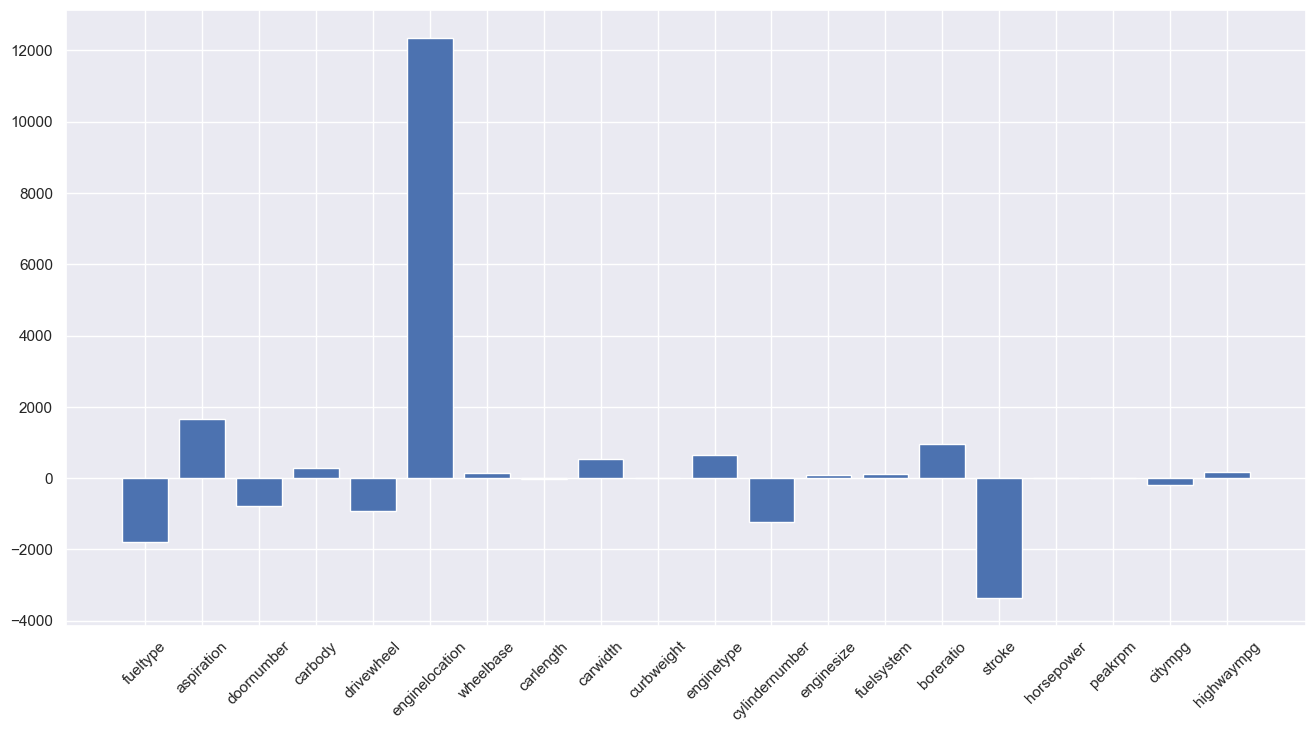

In [370]:
plt.bar(X_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()